In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [10]:
data = pd.read_csv('/content/statsfinal.csv')

In [11]:
data.head()
# Q1 Product sales of product 1
# S-P1 total revenue of product 1

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04


_______________________


In [12]:
data.isnull().sum()

Unnamed: 0    0
Date          0
Q-P1          0
Q-P2          0
Q-P3          0
Q-P4          0
S-P1          0
S-P2          0
S-P3          0
S-P4          0
dtype: int64

In [13]:
# Ekstrak data berdasarkan day,month,year dari kolom dengan fungsi lambda

data['Day'] = data['Date'].apply(lambda x: x.split('-')[0])
data['Month'] = data['Date'].apply(lambda x: x.split('-')[1])
data['Year'] = data['Date'].apply(lambda x: x.split('-')[2])
data

,Unnamed: 0,Date,Q-P1,Q-P2,Q-P3,Q-P4,S-P1,S-P2,S-P3,S-P4,Day,Month,Year
0,0,13-06-2010,5422,3725,576,907,17187.74,23616.50,3121.92,6466.91,13,06,2010
1,1,14-06-2010,7047,779,3578,1574,22338.99,4938.86,19392.76,11222.62,14,06,2010
2,2,15-06-2010,1572,2082,595,1145,4983.24,13199.88,3224.90,8163.85,15,06,2010
3,3,16-06-2010,5657,2399,3140,1672,17932.69,15209.66,17018.80,11921.36,16,06,2010
4,4,17-06-2010,3668,3207,2184,708,11627.56,20332.38,11837.28,5048.04,17,06,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,4595,30-01-2023,2476,3419,525,1359,7848.92,21676.46,2845.50,9689.67,30,01,2023
4596,4596,31-01-2023,7446,841,4825,1311,23603.82,5331.94,26151.50,9347.43,31,01,2023
4597,4597,01-02-2023,6289,3143,3588,474,19936.13,19926.62,19446.96,3379.62,01,02,2023
4598,4598,02-02-2023,3122,1188,5899,517,9896.74,7531.92,31972.58,3686.21,02,02,2023


In [14]:
data_reduced = data.query("Year != '2010' and Year != '2023'")

In [22]:
#Create a function that allows us to plot a bar chart for the 4 products
def plot_bar_chart(df, columns, stri, str1, val):
    # Aggregate sales for each product by year, by sum or mean
    if val == 'sum':
        sales_by_year = df.groupby('Year')[columns].sum().reset_index()
    elif val == 'mean':
        sales_by_year = df.groupby('Year')[columns].mean().reset_index()

        # Melt the data to make it easier to plot
    sales_by_year_melted = pd.melt(sales_by_year, id_vars='Year', value_vars=columns, var_name='Product', value_name='Sales')

    # Create a bar chart
    plt.figure(figsize=(20,4))
    sns.barplot(data=sales_by_year_melted, x='Year', y='Sales', hue='Product') #,palette="cividis")
    plt.xlabel('Year')
    plt.ylabel(stri)
    plt.title(f'{stri} by {str1}')
    plt.xticks(rotation=45)
    plt.show()


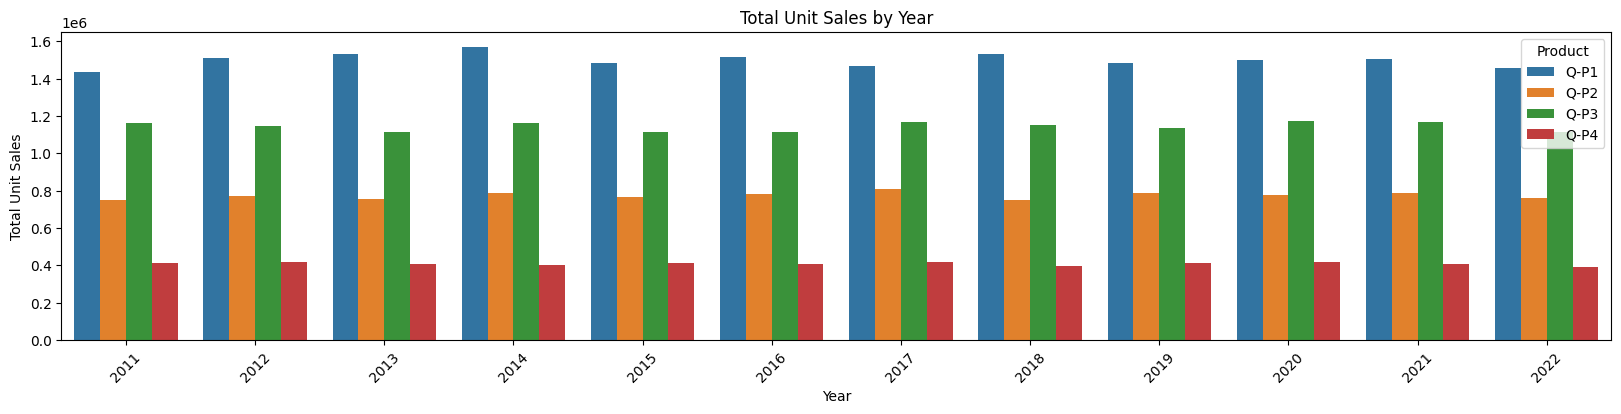

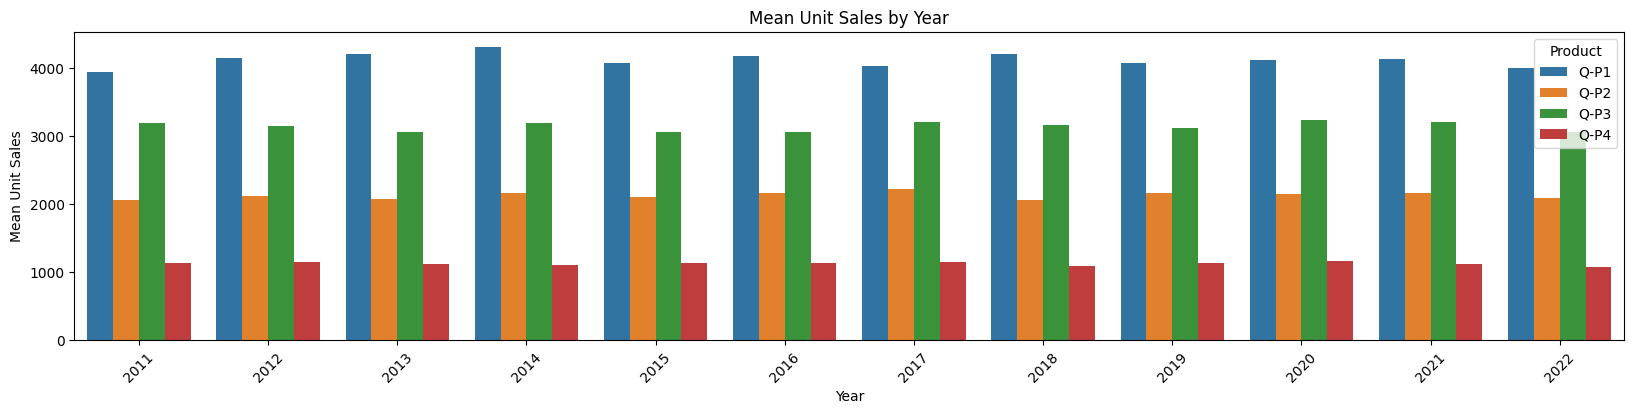

In [23]:
#use the plot_bar_chart function, enter the Unit Sales Columns and the Unit Sales string
plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Total Unit Sales', 'Year', 'sum')

plot_bar_chart(data_reduced, ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4'],'Mean Unit Sales', 'Year', 'mean')
